In [1]:
import numpy as np
import pandas
import networkx as nx
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statannot import add_stat_annotation
import glob
from tqdm.notebook import tqdm
from numpy import random
import copy
import griottes
import griottes.analyse
from griottes.graphmaker import make_spheroids
from griottes.graphmaker import graph_generation_func
from griottes.graphplotter import graph_plot
from scipy import stats

# Notebook to plot contact of progenitors and stromal cells cells at E12.5 (relative to Figure 3)

# Contact to HNF4a$^+$cells

In [2]:
Contact_to_HNF4a = pandas.read_csv('Data_figures/Contact_prog_HNF4a.csv')
contact_prog_HNF4a_single_cell = pandas.read_csv('Data_figures/Contact_prog_HNF4a_single_cell.csv')

### Plot

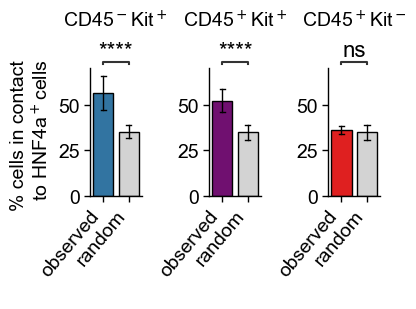

In [3]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, 3, figsize = (4,3.2))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

order = ['observed', 'random']

for i in range(3):
    ax[i].set_ylim(0,70)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].tick_params(axis='x', labelsize=14, rotation=45)
    ax[i].tick_params(axis='y', labelsize=14)        
    ax[i].tick_params(width=1, length=4)
    for axis in ['bottom','left']:
            ax[i].spines[axis].set_linewidth(1)
            
sns.barplot(ax=ax[0],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_HNF4a.loc[Contact_to_HNF4a.cell_type == 'CD45$^-$Kit$^+$'],
                 order = order,
                 palette = ['tab:blue', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_HNF4a_single_cell.loc[contact_prog_HNF4a_single_cell.cell_type == 'CD45$^-$Kit$^+$'],
                    ax=ax[0],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[1],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_HNF4a.loc[Contact_to_HNF4a.cell_type == 'CD45$^+$Kit$^+$'],
                 order = order,
                 palette = ['purple', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_HNF4a_single_cell.loc[contact_prog_HNF4a_single_cell.cell_type == 'CD45$^+$Kit$^+$'],
                    ax=ax[1],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[2],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_HNF4a.loc[Contact_to_HNF4a.cell_type == 'CD45$^+$Kit$^-$'],
                 order = order,
                 palette = ['red', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_HNF4a_single_cell.loc[contact_prog_HNF4a_single_cell.cell_type == 'CD45$^+$Kit$^-$'],
                    ax=ax[2],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

ax[0].set_ylabel('% cells in contact \n to HNF4a$^+$cells', fontsize = 14)
ax[1].set_ylabel(' ', fontsize = 12)
ax[2].set_ylabel(' ', fontsize = 12)

ax[0].set_xlabel(' ')
ax[1].set_xlabel(' ')
ax[2].set_xlabel(' ')

ax[0].set_title('CD45$^-$Kit$^+$', fontsize = 14, pad = 30)
ax[1].set_title('CD45$^+$Kit$^+$', fontsize = 14, pad = 30)
ax[2].set_title('CD45$^+$Kit$^-$', fontsize = 14, pad = 30)

ticklabels = ['observed', 'random']
for i in range(3):
    ax[i].set_xticklabels(ticklabels,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

plt.tight_layout()
plt.show()

# Contact to LHX2$^+$cells

In [13]:
Contact_to_LHX2 = pandas.read_csv('Data_figures/Contact_prog_LHX2.csv')
contact_prog_LHX2_single_cell = pandas.read_csv('Data_figures/Contact_prog_LHX2_single_cell.csv')

### Plot

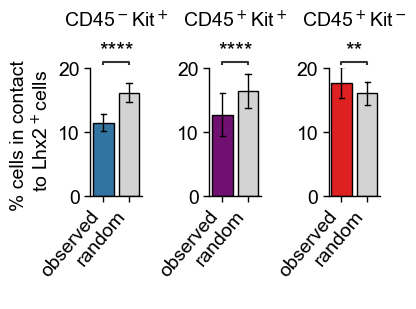

In [15]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, 3, figsize = (4,3.2))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

order = ['observed', 'random']

for i in range(3):
    ax[i].set_ylim(0,20)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].tick_params(axis='x', labelsize=14, rotation=45)
    ax[i].tick_params(axis='y', labelsize=14)        
    ax[i].tick_params(width=1, length=4)
    for axis in ['bottom','left']:
            ax[i].spines[axis].set_linewidth(1)
            
sns.barplot(ax=ax[0],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_LHX2.loc[Contact_to_LHX2.cell_type == 'CD45$^-$Kit$^+$'],
                 order = order,
                 palette = ['tab:blue', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_LHX2_single_cell.loc[contact_prog_LHX2_single_cell.cell_type == 'CD45$^-$Kit$^+$'],
                    ax=ax[0],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[1],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_LHX2.loc[Contact_to_LHX2.cell_type == 'CD45$^+$Kit$^+$'],
                 order = order,
                 palette = ['purple', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_LHX2_single_cell.loc[contact_prog_LHX2_single_cell.cell_type == 'CD45$^+$Kit$^+$'],
                    ax=ax[1],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[2],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_LHX2.loc[Contact_to_LHX2.cell_type == 'CD45$^+$Kit$^-$'],
                 order = order,
                 palette = ['red', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_LHX2_single_cell.loc[contact_prog_LHX2_single_cell.cell_type == 'CD45$^+$Kit$^-$'],
                    ax=ax[2],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

ax[0].set_ylabel('% cells in contact \n to Lhx2$^+$cells', fontsize = 14)
ax[1].set_ylabel(' ', fontsize = 12)
ax[2].set_ylabel(' ', fontsize = 12)

ax[0].set_xlabel(' ')
ax[1].set_xlabel(' ')
ax[2].set_xlabel(' ')

ax[0].set_title('CD45$^-$Kit$^+$', fontsize = 14, pad = 30)
ax[1].set_title('CD45$^+$Kit$^+$', fontsize = 14, pad = 30)
ax[2].set_title('CD45$^+$Kit$^-$', fontsize = 14, pad = 30)

ticklabels = ['observed', 'random']
for i in range(3):
    ax[i].set_xticklabels(ticklabels,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

plt.tight_layout()
plt.show()

# Contact to FLK1$^+$cells

In [16]:
Contact_to_FLK1 = pandas.read_csv('Data_figures/Contact_prog_FLK1.csv')
contact_prog_FLK1_single_cell = pandas.read_csv('Data_figures/Contact_prog_FLK1_single_cell.csv')

### Plot

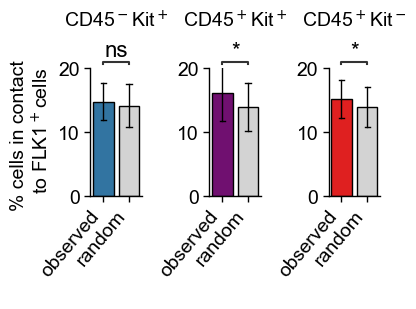

In [17]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, 3, figsize = (4,3.2))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

order = ['observed', 'random']

for i in range(3):
    ax[i].set_ylim(0,20)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].tick_params(axis='x', labelsize=14, rotation=45)
    ax[i].tick_params(axis='y', labelsize=14)        
    ax[i].tick_params(width=1, length=4)
    for axis in ['bottom','left']:
            ax[i].spines[axis].set_linewidth(1)
            
sns.barplot(ax=ax[0],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_FLK1.loc[Contact_to_FLK1.cell_type == 'CD45$^-$Kit$^+$'],
                 order = order,
                 palette = ['tab:blue', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_FLK1_single_cell.loc[contact_prog_FLK1_single_cell.cell_type == 'CD45$^-$Kit$^+$'],
                    ax=ax[0],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[1],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_FLK1.loc[Contact_to_FLK1.cell_type == 'CD45$^+$Kit$^+$'],
                 order = order,
                 palette = ['purple', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_FLK1_single_cell.loc[contact_prog_FLK1_single_cell.cell_type == 'CD45$^+$Kit$^+$'],
                    ax=ax[1],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

sns.barplot(ax=ax[2],
                 x = 'type',
                 y = 'fraction',
                 data=Contact_to_FLK1.loc[Contact_to_FLK1.cell_type == 'CD45$^+$Kit$^-$'],
                 order = order,
                 palette = ['red', 'lightgray'],
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'r',
                 lw = 1, 
                 edgecolor="0")

add_stat_annotation(x="type",
                    y="contact",
                    data=contact_prog_FLK1_single_cell.loc[contact_prog_FLK1_single_cell.cell_type == 'CD45$^+$Kit$^-$'],
                    ax=ax[2],
                    box_pairs=[('observed', 'random'),],
                    test='t-test_welch',
                    comparisons_correction=None, 
                    fontsize = 16,
                    text_format='star',
                    loc='outside',
                    verbose=0)

ax[0].set_ylabel('% cells in contact \n to FLK1$^+$cells', fontsize = 14)
ax[1].set_ylabel(' ', fontsize = 12)
ax[2].set_ylabel(' ', fontsize = 12)

ax[0].set_xlabel(' ')
ax[1].set_xlabel(' ')
ax[2].set_xlabel(' ')

ax[0].set_title('CD45$^-$Kit$^+$', fontsize = 14, pad = 30)
ax[1].set_title('CD45$^+$Kit$^+$', fontsize = 14, pad = 30)
ax[2].set_title('CD45$^+$Kit$^-$', fontsize = 14, pad = 30)

ticklabels = ['observed', 'random']
for i in range(3):
    ax[i].set_xticklabels(ticklabels,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

plt.tight_layout()
plt.show()